# Description

Pymovebank provides tools to efficiently subset large geospatial datasets to an 
area of interest. A few examples are shown on this page, but see the **Examples** 
section for more demonstrations!

**Key Features**
- Efficiently subset large geospatial datasets to a smaller area of interest, and 
write the results to new files that can be used in other analysis tools
- Choose from three options for providing a subsetting boundary:
    - Provide bounding box coordinates
    - Provide another geospatial datalayer (e.g., a shapefile with a region boundary)
    - Provide a csv file of Movebank animal track data, and a boundary will be drawn 
    that encompasses the track locations
- Options to use both rectangular subsetting boundaries and irregular boundary shapes

```{note}
Pymovebank is in the early stages of development, and any feedback is welcome! If you have any suggestions or feature requests, enounter any bugs, or come across places where the documentation is unclear, please [submit a GitHub issue](https://github.com/jemissik/pymovebank/issues)!
```


# A few examples:

In [1]:
import pymovebank as pmv

import geopandas as gpd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
pmv.datasets.available

['GRIP4_GlobalRoads.gdb',
 'caribou_reference_data.csv',
 'caribou_data.csv',
 'y2y_region_priority_areas_2013.gdb']

In [3]:
# Shapefile of GRIP Region 1 dataset
roadsfile = pmv.get_path("GRIP4_GlobalRoads.gdb")

## Subsetting the GRIP global roads dataset using a bounding box

If you only need to subset a small area of a spatial dataset, this can be done very quickly even if you are subsetting from a very large dataset (in this example, the GRIP global roads dataset, which is over 4 GB):

In [4]:
# Small subset for testing (lat/long bounding box coordinates)
bbox = [-123, 54, -120, 56] 

In [5]:
%%time
roads_subset, boundary = pmv.subset_data(roadsfile, bbox=bbox)

CPU times: user 20.5 ms, sys: 5.83 ms, total: 26.3 ms
Wall time: 37 ms


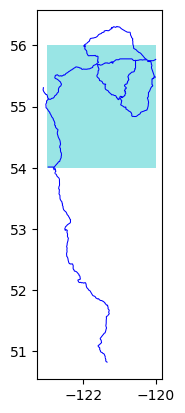

In [6]:
pmv.plot_subset(roads_subset, boundary)

Larger subsets with a lot of features will take a bit longer, but are still quite manageable. The requested subset in the next example has over 300,000 records:

In [7]:
# Larger subset for testing 
bbox = [-141, 41, -108, 67] 

In [8]:
del roads_subset, boundary   

In [9]:
%%time
roads_subset, boundary = pmv.subset_data(roadsfile, bbox=bbox)

CPU times: user 10.3 s, sys: 415 ms, total: 10.7 s
Wall time: 11.1 s


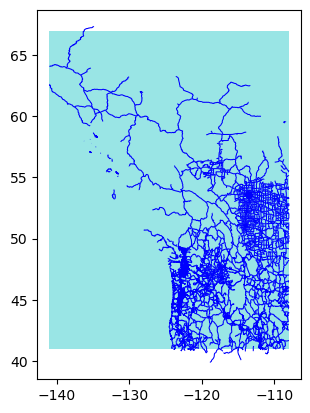

In [10]:
pmv.plot_subset(roads_subset, boundary)

In [11]:
del roads_subset, boundary   

## Subsetting using bounding geometry from a file

In this case, subsetting using the Y2Y region boundary. 
The roads dataset and the GIS layer with the Y2Y boundary are in different projections; this is handled. 

In [12]:
y2yfile = pmv.get_path('y2y_region_priority_areas_2013.gdb')
# Reading in the region boundary here, to display it with the examples. 
# For just subsetting, you don't need to read in this file
y2y = gpd.read_file(y2yfile)

You can use a rectangular bounding box around the region boundary for subsetting, but there are also options to instead use the actual region boundary, or a convex hull around the region boundary. These options can also be used with a buffer size around the boundary, if you want to get features that are close to the boundary as well. 

Here, demonstrating using the actual region boundary to subset. This option can save a lot of time if you have an irregular boundary shape, and don't actually need all of the features in the whole bounding box outside the boundary shape:

In [13]:
%%time
roads_subset, boundary = pmv.subset_data(roadsfile, bounding_geom=y2yfile, 
                                         boundary_type="mask")

CPU times: user 2.11 s, sys: 94.3 ms, total: 2.2 s
Wall time: 2.5 s


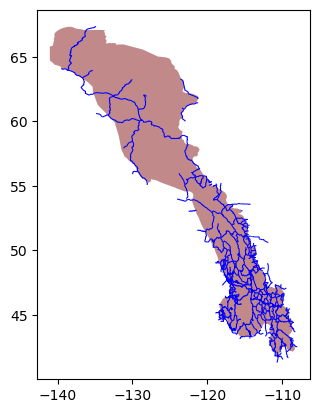

In [14]:
pmv.plot_subset(roads_subset, boundary, bounding_geom=y2y.to_crs(roads_subset.crs))

In [15]:
del roads_subset, boundary   

## Subsetting using animal track data

Instead of providing bounding box coordinates or a region boundary for subsetting, you can also provide a csv file with animal track data. A boundary will be drawn around all the track points, with the option for either a rectangular boundary or convex hull. 

You can also specify a buffer size with this option. 

In [16]:
# Publicly available data from Mountain Caribou in British Columbia study: 
# https://www.movebank.org/cms/webapp?gwt_fragment=page=studies,path=study216040785

track_file = pmv.get_path("caribou_data.csv")

In [17]:
# Reading in the track data to plot with the results
# For just subsetting, the track data doesn't need to be read in directly 
tracks = pmv.read_track_data(track_file)

In the next example, demonstrating the option to use a convex hull around the track points, with a buffer. Note that the track data in this case includes almost 250,000 points.

In [18]:
%%time
roads_subset, boundary = pmv.subset_data(roadsfile, track_points=track_file, 
                                         boundary_type='convex_hull', buffer=0.2)

CPU times: user 8.76 s, sys: 118 ms, total: 8.87 s
Wall time: 8.89 s


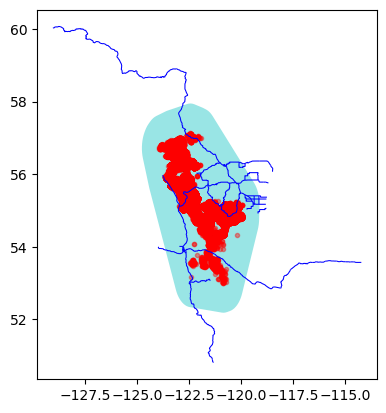

In [19]:
pmv.plot_subset(roads_subset, boundary, track_points=tracks)

# Contents

```{toctree}
---
maxdepth: 2
---
getting_started
examples
subset_function
pymovebank
developing
```

# Indices and tables

* {ref}`genindex`
* {ref}`modindex`
* {ref}`search`